# **Steel Fatigue Strength Prediction using Machine Learning**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


Top Positive Correlations:
 Fatigue    1.000000
Tt         0.860337
CT         0.850296
DT         0.848612
Ct         0.778942
Dt         0.726105
QmT        0.687954
NT         0.649459
Cr         0.434295
Mo         0.403535
Name: Fatigue, dtype: float64

Top Negative Correlations:
 Mn         -0.167310
P          -0.172063
dB         -0.205290
RedRatio   -0.227418
C          -0.412313
THQCr      -0.553098
TT         -0.634550
TCr        -0.650692
THt        -0.655897
THT        -0.656615
Name: Fatigue, dtype: float64


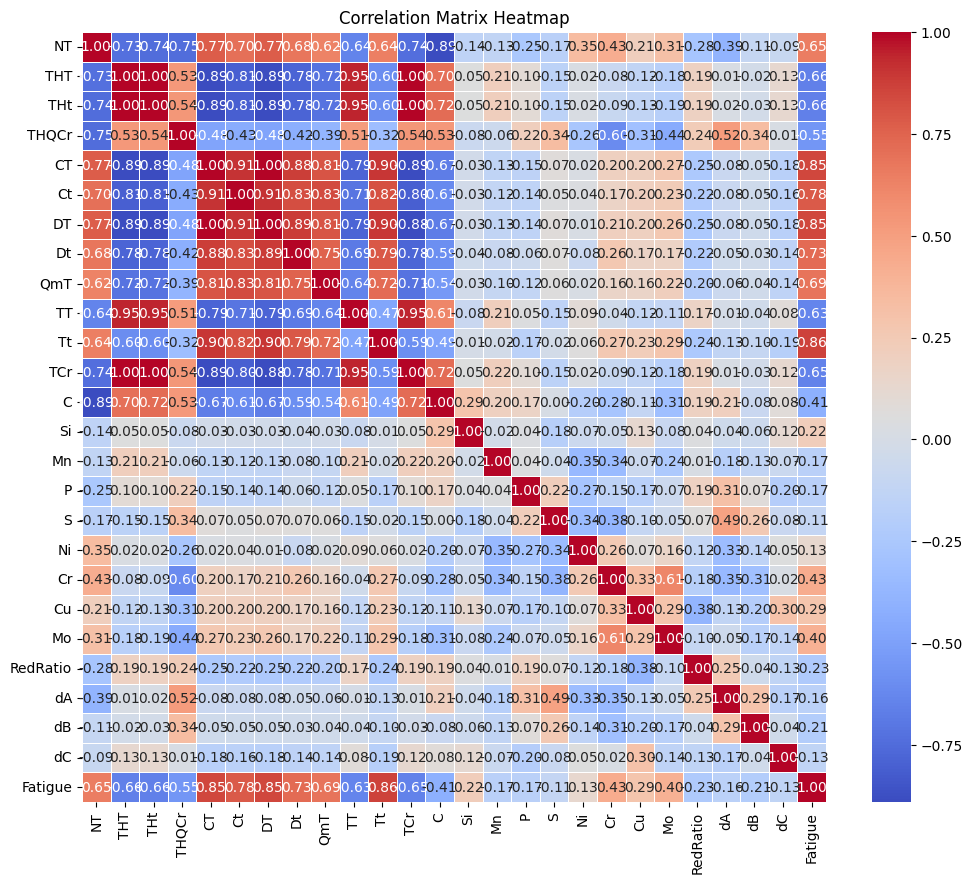

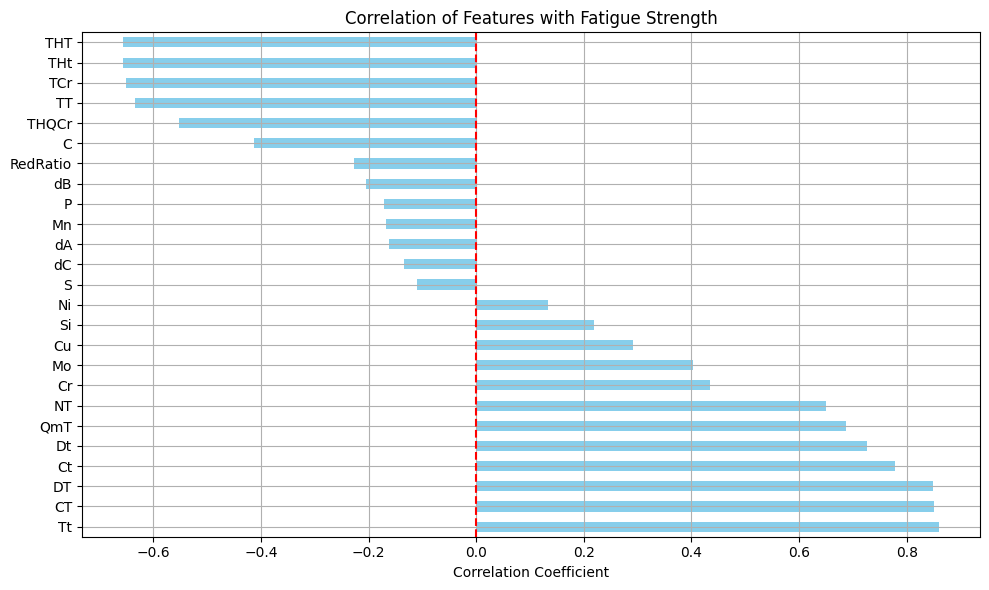

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data.csv")


df.drop(columns=['Sl. No.'], inplace=True)


corr_matrix = df.corr(numeric_only=True)

corr_with_target = corr_matrix['Fatigue'].sort_values(ascending=False)

print("Top Positive Correlations:\n", corr_with_target.head(10))
print("\nTop Negative Correlations:\n", corr_with_target.tail(10))


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

plt.figure(figsize=(10, 6))
corr_with_target.drop('Fatigue').plot(kind='barh', color='skyblue')
plt.axvline(0, color='red', linestyle='--')
plt.title('Correlation of Features with Fatigue Strength')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()


# **Random forest model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv("data.csv")
df.drop(columns=['Sl. No.'], inplace=True)
corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix['Fatigue']
selected_features = target_corr[abs(target_corr) > 0.4].index.tolist()

selected_features.remove('Fatigue')

print("***selected properties***", selected_features)

X = df[selected_features]
y = df['Fatigue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" RMSE: {rmse:.2f}")
print(f" R² Score: {r2:.3f}")


***selected properties*** ['NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT', 'TT', 'Tt', 'TCr', 'C', 'Cr', 'Mo']
 RMSE: 27.83
 R² Score: 0.981


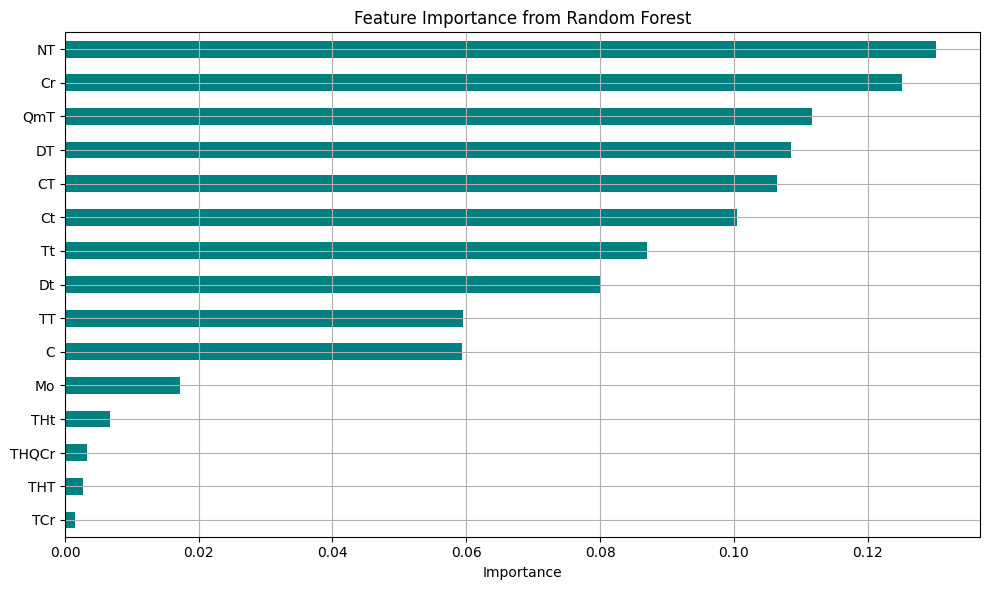

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_importance = pd.Series(importances, index=selected_features).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='teal')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.grid(True)
plt.tight_layout()
plt.show()


# random forest with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=2)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("BEST PARAMETERS", grid_search.best_params_)


y_pred_optimized = best_model.predict(X_test)
rmse_optimized = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"RMSE: {rmse_optimized:.2f}")
print(f"R2: {r2_optimized:.3f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
BEST PARAMETERS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 26.48
R2: 0.983


residuals and predictions

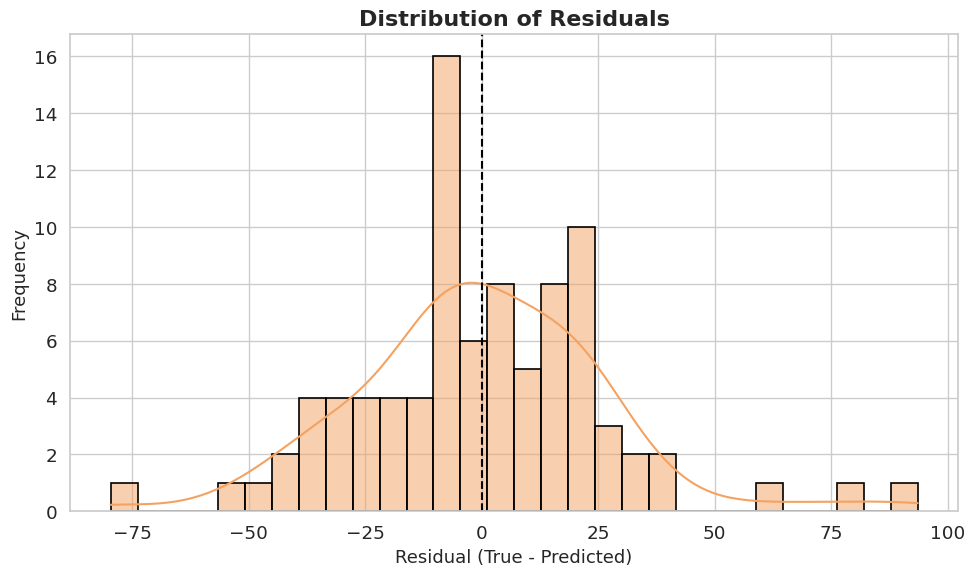

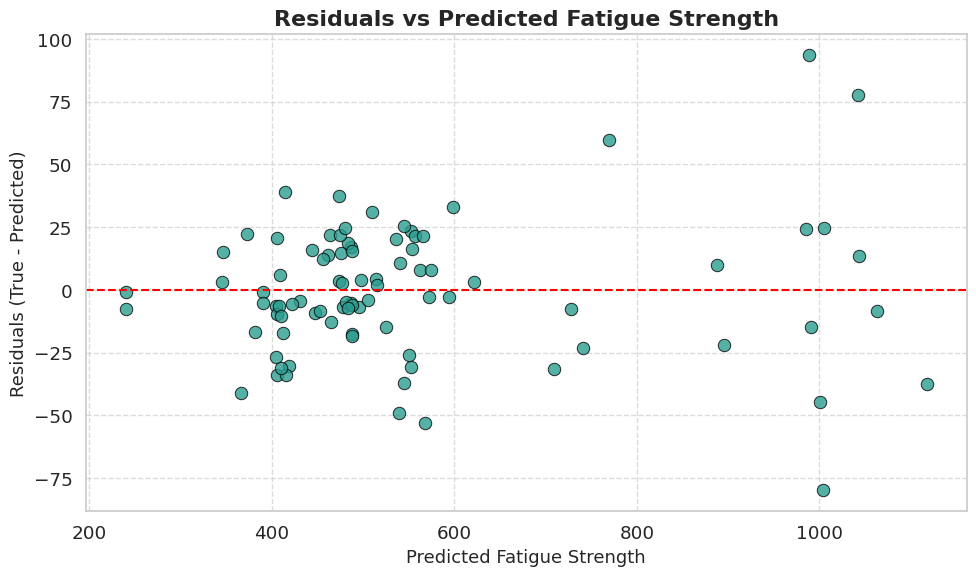

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

residuals = y_test - y_pred_optimized

sns.set(style='whitegrid', context='notebook', font_scale=1.2)

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color="#F4A261", edgecolor='black', linewidth=1.2)
plt.axvline(0, color='black', linestyle='--', lw=1.5)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residual (True - Predicted)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.tight_layout()
plt.savefig('residual_distribution.png', dpi=300)
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_optimized, y=residuals, color="#2A9D8F", s=80, edgecolor='black', alpha=0.8)
plt.axhline(0, color='red', linestyle='--', lw=1.5)
plt.title('Residuals vs Predicted Fatigue Strength', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Fatigue Strength', fontsize=13)
plt.ylabel('Residuals (True - Predicted)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('residuals_vs_predicted.png', dpi=300)
plt.show()


feature importance


<ipython-input-12-d6377080ecfb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')


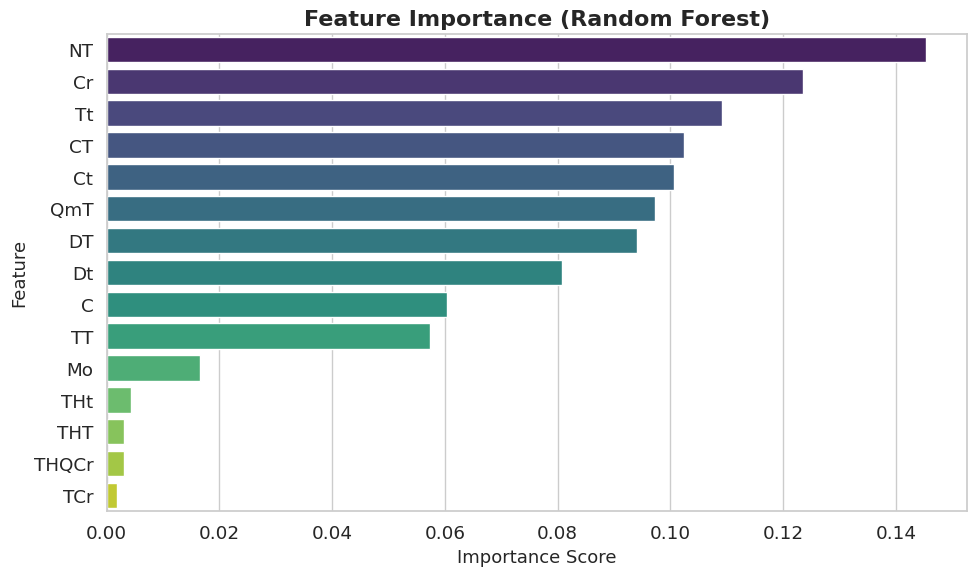

In [ ]:
importances = best_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=13)
plt.ylabel('Feature', fontsize=13)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()


actual vs predicted plot

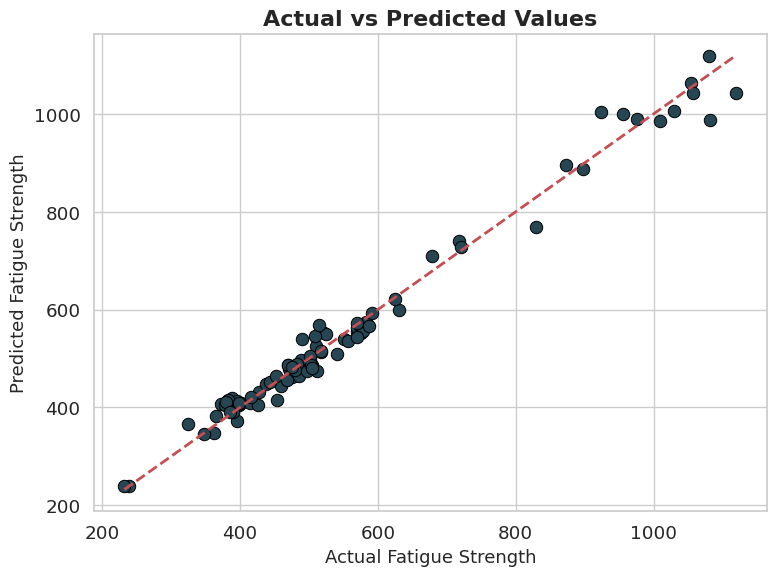

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_optimized, color="#264653", s=80, edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Fatigue Strength', fontsize=13)
plt.ylabel('Predicted Fatigue Strength', fontsize=13)
plt.title('Actual vs Predicted Values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300)
plt.show()


corelation matrix

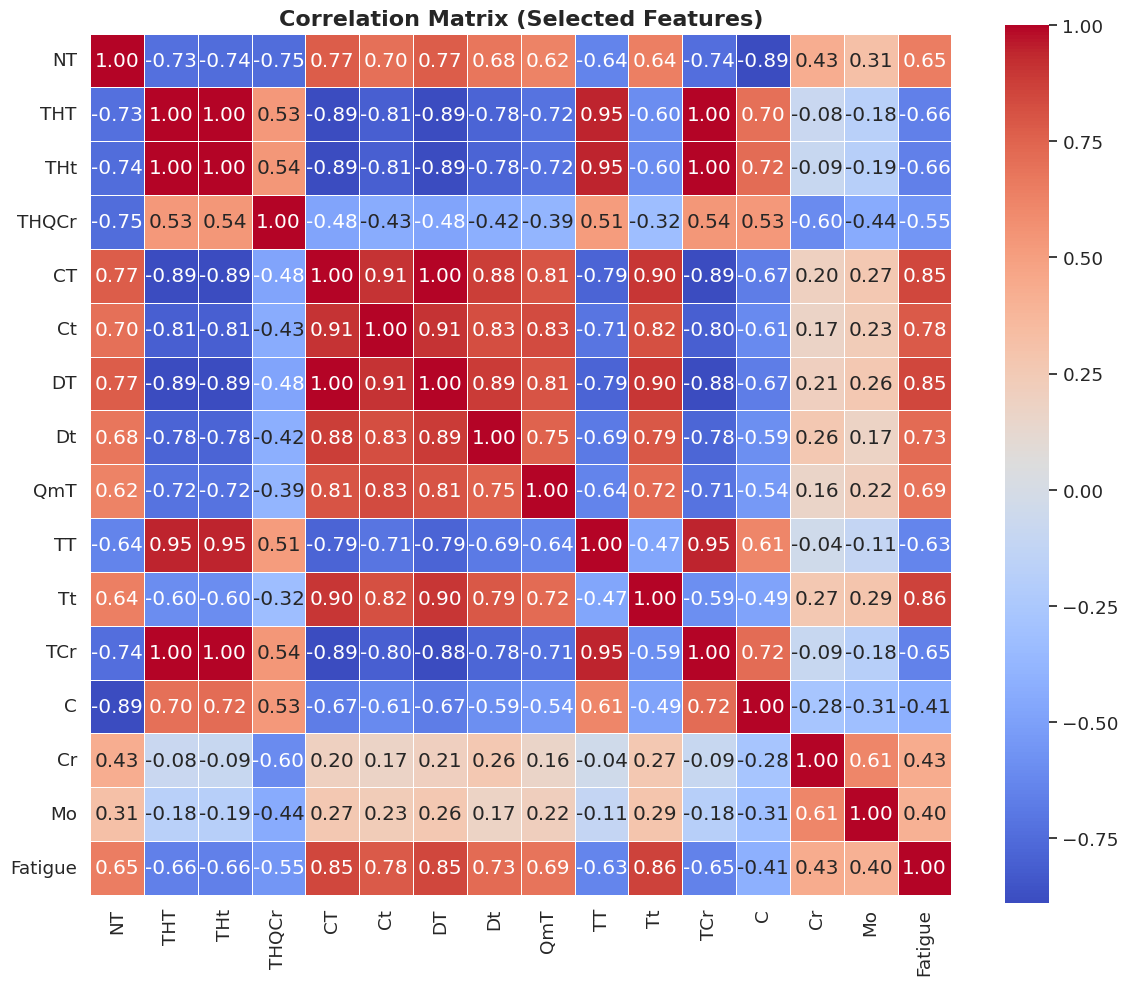

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = df[selected_features + ['Fatigue']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix (Selected Features)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()
